In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = 'data.json'

def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)
        
        
    # convert lists into numpy arrays
    X = np.array(data['mfcc'])
    y = np.array(data['labels'])
    
    return X,y

def prepare_datasets(test_size, validation_size):
    # load data
    X,y = load_data(DATASET_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    
    # tensorflow expect 3d arr -> (130, 13, 1)
    X_train = X_train[..., np.newaxis] # 4d arr -> (num_samples, 130, 13, 1)
    X_validation = X_validation[..., np.newaxis] 
    X_test = X_test[..., np.newaxis]
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    # create model
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

def predict(model, X, y):
    
    X = X[np.newaxis, ...]
    
    # prediction = [ [0.1, 0.2, ...]]
    prediction = model.predict(X) # X -> (130, 13, 1) menjadikan 3d menjadi 4d
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis=1) # [4]
    print(f'Expected index: {y}, Predicted index: {predicted_index}')
    
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history['accuracy'], label='train accuracy')
    axs[0].plot(history.history['val_accuracy'], label='test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].set_title('Accuracy eval')
    
    # create error subplot
    axs[0].plot(history.history['loss'], label='train error')
    axs[0].plot(history.history['val_loss'], label='test error')
    axs[0].set_ylabel('Error')
    axs[0].legend(loc='upper right')
    axs[0].set_title('Error eval')
    
    plt.show()
    
if __name__ == '__main__':
    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    
    # build CNN net
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    model = build_model(input_shape)
    
    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    
    # train the CNN
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
    
    # plot acc/error for training and validation
    plot_history(history)
    
    # evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Accuracy on test set is: {test_accuracy}")
    
    # make prediction on a sample
    X = X_test[100]
    y = y_test[100]
    
    predict(model, X, y)
    

Epoch 1/30
188/188 [==============================] - 10s 48ms/step - loss: 2.5277 - accuracy: 0.2093 - val_loss: 1.7882 - val_accuracy: 0.3625
Epoch 2/30
188/188 [==============================] - 9s 49ms/step - loss: 1.8915 - accuracy: 0.3415 - val_loss: 1.4737 - val_accuracy: 0.4713
Epoch 3/30
188/188 [==============================] - 9s 49ms/step - loss: 1.6676 - accuracy: 0.4143 - val_loss: 1.3237 - val_accuracy: 0.5314
Epoch 4/30
188/188 [==============================] - 9s 49ms/step - loss: 1.5240 - accuracy: 0.4582 - val_loss: 1.2351 - val_accuracy: 0.5581
Epoch 5/30
188/188 [==============================] - 9s 48ms/step - loss: 1.4174 - accuracy: 0.4976 - val_loss: 1.1901 - val_accuracy: 0.5654
Epoch 6/30
188/188 [==============================] - 9s 46ms/step - loss: 1.3682 - accuracy: 0.5103 - val_loss: 1.1305 - val_accuracy: 0.5988
Epoch 7/30
188/188 [==============================] - 9s 46ms/step - loss: 1.3009 - accuracy: 0.5447 - val_loss: 1.0730 - val_accuracy: 0.616

<Figure size 640x480 with 2 Axes>

79/79 [==============================] - 1s 13ms/step - loss: 0.8252 - accuracy: 0.7161
Accuracy on test set is: 0.7160592675209045
Expected index: 5, Predicted index: [5]


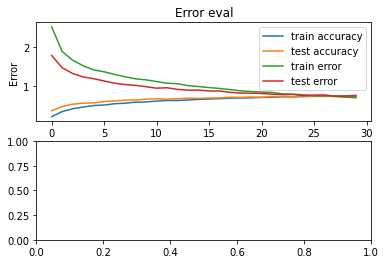

In [4]:
# plot acc/error for training and validation
plot_history(history)